In [77]:
import json
import numpy as np


In [78]:
NAME='PA_president'
#NAME="GA_president"
#NAME="AZ_president"
#NAME="WI_president"
#NAME="MI_president"
with open(NAME + '.json', encoding="utf8") as f:
        x = json.load(f)

In [79]:
# example of election data from a county 
x["data"]["races"][0]['counties'][0]

{'fips': '42001',
 'name': 'Adams',
 'votes': 56635,
 'absentee_votes': 0,
 'reporting': 50,
 'precincts': 50,
 'absentee_method': "Merged into voters' home precincts and released with cumulative results",
 'eevp': 100,
 'tot_exp_vote': 56000,
 'eevp_value': '>98%',
 'eevp_display': '>98% reported',
 'eevp_source': 'edison',
 'turnout_stage': 4,
 'absentee_count_progress': 'none',
 'absentee_outstanding': None,
 'absentee_max_ballots': 3456,
 'provisional_outstanding': None,
 'provisional_count_progress': None,
 'results': {'bidenj': 18254, 'trumpd': 37567, 'jorgensenj': 814},
 'results_absentee': {'bidenj': 0, 'trumpd': 0, 'jorgensenj': 0},
 'last_updated': '2020-11-14T16:39:11Z',
 'leader_margin_value': 34.10082,
 'leader_margin_display': 'R+34',
 'leader_margin_name_display': 'Trump +34',
 'leader_party_id': 'republican',
 'margin2020': 34.10082,
 'votes2016': 47990,
 'margin2016': 35.8,
 'votes2012': 42457,
 'margin2012': 27.5}

In [80]:
# time series of election data ; vote_shares: percentage of each candidate; votes: total votes ; eevp: percentage report;
# eevp_source: edison research ; timestamp: timepoint at which data is updated 
series=x["data"]["races"][0]["timeseries"]
series

[{'vote_shares': {'trumpd': 0, 'bidenj': 0},
  'votes': 0,
  'eevp': 0,
  'eevp_source': 'edison',
  'timestamp': '2020-11-04T09:25:23Z'},
 {'vote_shares': {'bidenj': 0.571, 'trumpd': 0.429},
  'votes': 77,
  'eevp': 0,
  'eevp_source': 'edison',
  'timestamp': '2020-11-04T00:19:27Z'},
 {'vote_shares': {'trumpd': 0, 'bidenj': 0},
  'votes': 0,
  'eevp': 0,
  'eevp_source': 'edison',
  'timestamp': '2020-11-04T00:30:20Z'},
 {'vote_shares': {'bidenj': 0.636, 'trumpd': 0.364},
  'votes': 11,
  'eevp': 0,
  'eevp_source': 'edison',
  'timestamp': '2020-11-04T00:42:45Z'},
 {'vote_shares': {'trumpd': 0, 'bidenj': 0},
  'votes': 0,
  'eevp': 0,
  'eevp_source': 'edison',
  'timestamp': '2020-11-04T00:59:15Z'},
 {'vote_shares': {'bidenj': 0.799, 'trumpd': 0.188},
  'votes': 64535,
  'eevp': 1,
  'eevp_source': 'edison',
  'timestamp': '2020-11-04T01:03:44Z'},
 {'vote_shares': {'bidenj': 0.772, 'trumpd': 0.216},
  'votes': 86353,
  'eevp': 1,
  'eevp_source': 'edison',
  'timestamp': '2020-11-0

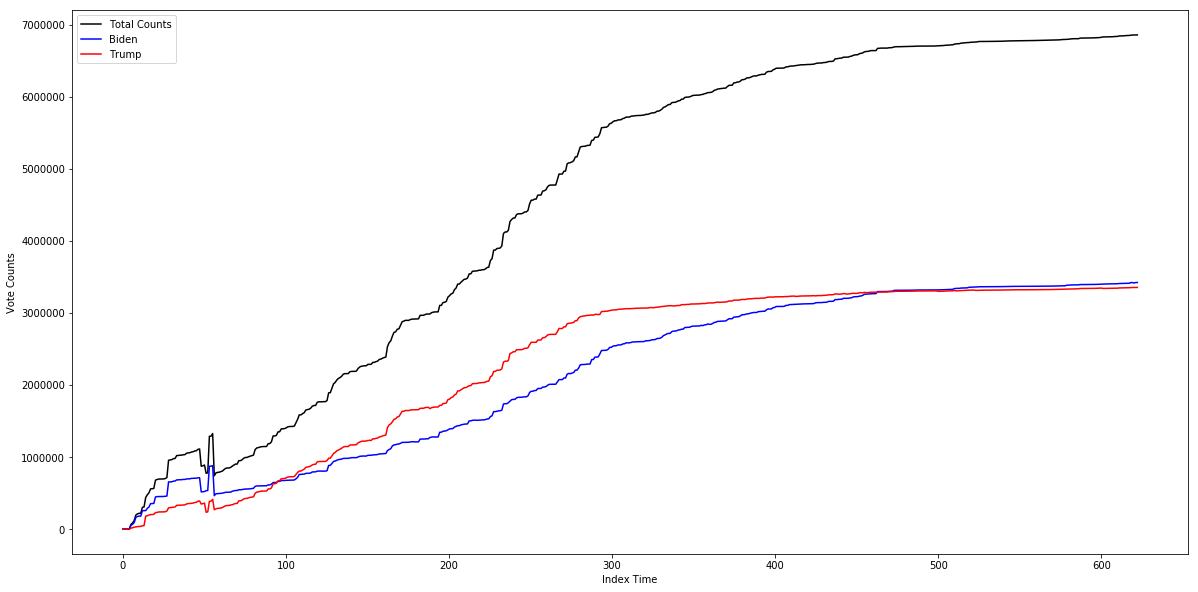

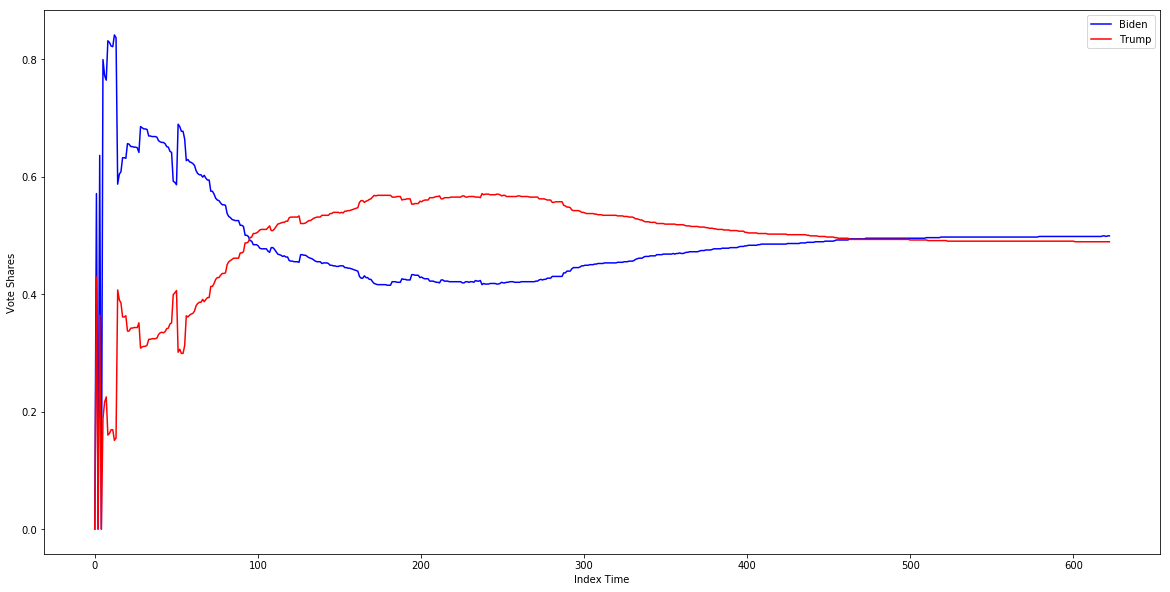

In [81]:
# plot vote time series
import numpy as np
import matplotlib.pyplot as plt
t=np.linspace(0,len(series),len(series))
TrumpNow=np.zeros((1,len(series)))
BidenNow=np.zeros((1,len(series)))
votesBiden=np.zeros((1,len(series)))
votesTrump=np.zeros((1,len(series)))
votes=np.zeros((1,len(series)))
for i in range(len(series)):
    TrumpNow[0,i]= series[i]["votes"] * series[i]["vote_shares"]["trumpd"]
    BidenNow[0,i]= series[i]["votes"] * series[i]["vote_shares"]["bidenj"]
    votes[0,i]=series[i]["votes"]
    votesBiden[0,i]=series[i]["vote_shares"]["bidenj"]
    votesTrump[0,i]=series[i]["vote_shares"]["trumpd"]
    
# plot votes counts over time
plt.figure(figsize=(20,10))    
plt.plot(t,votes[0],'k')
plt.plot(t,BidenNow[0],'b')
plt.plot(t,TrumpNow[0],'r')
plt.legend(('Total Counts','Biden','Trump'))
plt.ylabel('Vote Counts')
plt.xlabel('Index Time')
plt.show()

# plot votes shares over time
plt.figure(figsize=(20,10))    
plt.plot(t,votesBiden[0],'b')
plt.plot(t,votesTrump[0],'r')
plt.legend(('Biden','Trump'))
plt.ylabel('Vote Shares')
plt.xlabel('Index Time')
plt.show()

In [82]:
# find time when the vote count decrease at the next time point
for i in range(len(series)-1):
    if votes[0,i+1]<votes[0,i]: # if next vote count decrease
        print ("Index Now : " + str(i+1) + " Past Index : " + str(i))
        print ("Time Now : "+ series[i+1]["timestamp"] + " Past Time: "+ series[i]["timestamp"] )
        print ("Vote Now : " + str(votes[0,i+1]) + " Past Vote: " + str(votes[0,i]))
        print("Vote Diff: " + str(votes[0,i]-votes[0,i+1]) )
        print("Vote Diff Percentage: " + str((votes[0,i]-votes[0,i+1])/votes[0,i]) )
        print ("-----------")

Index Now : 2 Past Index : 1
Time Now : 2020-11-04T00:30:20Z Past Time: 2020-11-04T00:19:27Z
Vote Now : 0.0 Past Vote: 77.0
Vote Diff: 77.0
Vote Diff Percentage: 1.0
-----------
Index Now : 4 Past Index : 3
Time Now : 2020-11-04T00:59:15Z Past Time: 2020-11-04T00:42:45Z
Vote Now : 0.0 Past Vote: 11.0
Vote Diff: 11.0
Vote Diff Percentage: 1.0
-----------
Index Now : 48 Past Index : 47
Time Now : 2020-11-04T02:14:32Z Past Time: 2020-11-04T02:13:11Z
Vote Now : 871782.0 Past Vote: 1111586.0
Vote Diff: 239804.0
Vote Diff Percentage: 0.21573139640117814
-----------
Index Now : 51 Past Index : 50
Time Now : 2020-11-04T02:17:03Z Past Time: 2020-11-04T02:16:43Z
Vote Now : 774021.0 Past Vote: 888907.0
Vote Diff: 114886.0
Vote Diff Percentage: 0.12924411665112323
-----------
Index Now : 56 Past Index : 55
Time Now : 2020-11-04T02:22:45Z Past Time: 2020-11-04T02:21:59Z
Vote Now : 739443.0 Past Vote: 1325632.0
Vote Diff: 586189.0
Vote Diff Percentage: 0.4421958733645537
-----------
Index Now : 459 

In [83]:
# find time when votes for Trump decreases
TrumpTotalLost=0
for i in range(len(series)-1):
    if TrumpNow[0,i+1]<TrumpNow[0,i] and TrumpNow[0,i]-TrumpNow[0,i+1] > (0.00049999 * series[i+1]["votes"]) + 50:
        TrumpTotalLost += TrumpNow[0,i]-TrumpNow[0,i+1]
        print ("Index Now : " + str(i+1) + " Past Index : " + str(i))
        print ("Time Now : "+ series[i+1]["timestamp"] + " Past Time: "+ series[i]["timestamp"] )
        print ("Vote Now : " + str(TrumpNow[0,i+1]) + " Past Vote: " + str(TrumpNow[0,i]))
        print("Vote Diff: " + str(TrumpNow[0,i]-TrumpNow[0,i+1]) )
        print("Vote Diff Percentage: " + str((TrumpNow[0,i]-TrumpNow[0,i+1])/TrumpNow[0,i]) )
        print ("-----------")
    
print("Trump Total Lost: " + str(TrumpTotalLost))
print("Percent Lost: " + str(TrumpTotalLost/TrumpNow[0,len(series)-1]))

Index Now : 48 Past Index : 47
Time Now : 2020-11-04T02:14:32Z Past Time: 2020-11-04T02:13:11Z
Vote Now : 347841.01800000004 Past Vote: 390166.686
Vote Diff: 42325.66799999995
Vote Diff Percentage: 0.10848098907142459
-----------
Index Now : 51 Past Index : 50
Time Now : 2020-11-04T02:17:03Z Past Time: 2020-11-04T02:16:43Z
Vote Now : 232980.321 Past Vote: 360896.242
Vote Diff: 127915.92100000003
Vote Diff Percentage: 0.35443960372410865
-----------
Index Now : 56 Past Index : 55
Time Now : 2020-11-04T02:22:45Z Past Time: 2020-11-04T02:21:59Z
Vote Now : 268417.809 Past Vote: 413597.184
Vote Diff: 145179.375
Vote Diff Percentage: 0.3510163526645288
-----------
Index Now : 152 Past Index : 151
Time Now : 2020-11-04T03:37:38Z Past Time: 2020-11-04T03:36:12Z
Vote Now : 1229992.2780000002 Past Vote: 1232132.979
Vote Diff: 2140.7009999998845
Vote Diff Percentage: 0.0017373944505058852
-----------
Index Now : 188 Past Index : 187
Time Now : 2020-11-04T04:08:51Z Past Time: 2020-11-04T04:07:43Z


In [84]:
# find time when vote for Biden decreases
BidenTotalLost=0
for i in range(len(series)-1):
    if BidenNow[0,i+1]<BidenNow[0,i] and BidenNow[0,i]-BidenNow[0,i+1] > (0.00049999 * series[i+1]["votes"]) + 50:
        BidenTotalLost += BidenNow[0,i]-BidenNow[0,i+1]
        print ("Index Now : " + str(i+1) + " Past Index : " + str(i))
        print ("Time Now : "+ series[i+1]["timestamp"] + " Past Time: "+ series[i]["timestamp"] )
        print ("Vote Now : " + str(BidenNow[0,i+1]) + " Past Vote: " + str(BidenNow[0,i]))
        print("Vote Diff: " + str(BidenNow[0,i]-BidenNow[0,i+1]) )
        print("Vote Diff Percentage: " + str((BidenNow[0,i]-BidenNow[0,i+1])/BidenNow[0,i]) )
        print ("-----------")

print("Biden Total Lost: " + str(BidenTotalLost) )
print("Percent Lost: " + str(BidenTotalLost/BidenNow[0,len(series)-1]))

Index Now : 48 Past Index : 47
Time Now : 2020-11-04T02:14:32Z Past Time: 2020-11-04T02:13:11Z
Vote Now : 516094.94399999996 Past Vote: 712526.626
Vote Diff: 196431.6820000001
Vote Diff Percentage: 0.2756832865358776
-----------
Index Now : 56 Past Index : 55
Time Now : 2020-11-04T02:22:45Z Past Time: 2020-11-04T02:21:59Z
Vote Now : 463630.761 Past Vote: 880219.648
Vote Diff: 416588.88700000005
Vote Diff Percentage: 0.47327833222827587
-----------
Index Now : 76 Past Index : 75
Time Now : 2020-11-04T02:38:19Z Past Time: 2020-11-04T02:38:07Z
Vote Now : 555649.354 Past Vote: 556554.88
Vote Diff: 905.5259999999544
Vote Diff Percentage: 0.00162702014220045
-----------
Index Now : 122 Past Index : 121
Time Now : 2020-11-04T03:13:18Z Past Time: 2020-11-04T03:12:51Z
Vote Now : 803660.13 Past Vote: 805329.7440000001
Vote Diff: 1669.6140000000596
Vote Diff Percentage: 0.0020732054322335565
-----------
Index Now : 179 Past Index : 178
Time Now : 2020-11-04T04:00:36Z Past Time: 2020-11-04T03:59:2